# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import catboost as cb
from catboost import Pool,cv,CatBoostClassifier
from xgboost import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import *
from catboost import *

# Loading Dataset

In [2]:
df=pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.shape

(520, 17)

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

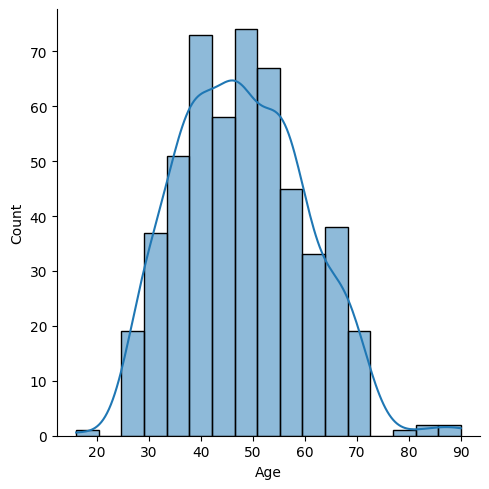

In [7]:
sns.displot(x='Age',data=df,kde=True)

In [8]:
df.groupby('Gender').size()

Gender
Female    192
Male      328
dtype: int64

In [9]:
df.groupby('class').size()

class
Negative    200
Positive    320
dtype: int64

# Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [11]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [12]:
features=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']
for i in features:
    df[i]=le.fit_transform(df[i])

In [13]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


No=0,Yes=1
Male=1,Female=0


<AxesSubplot:>

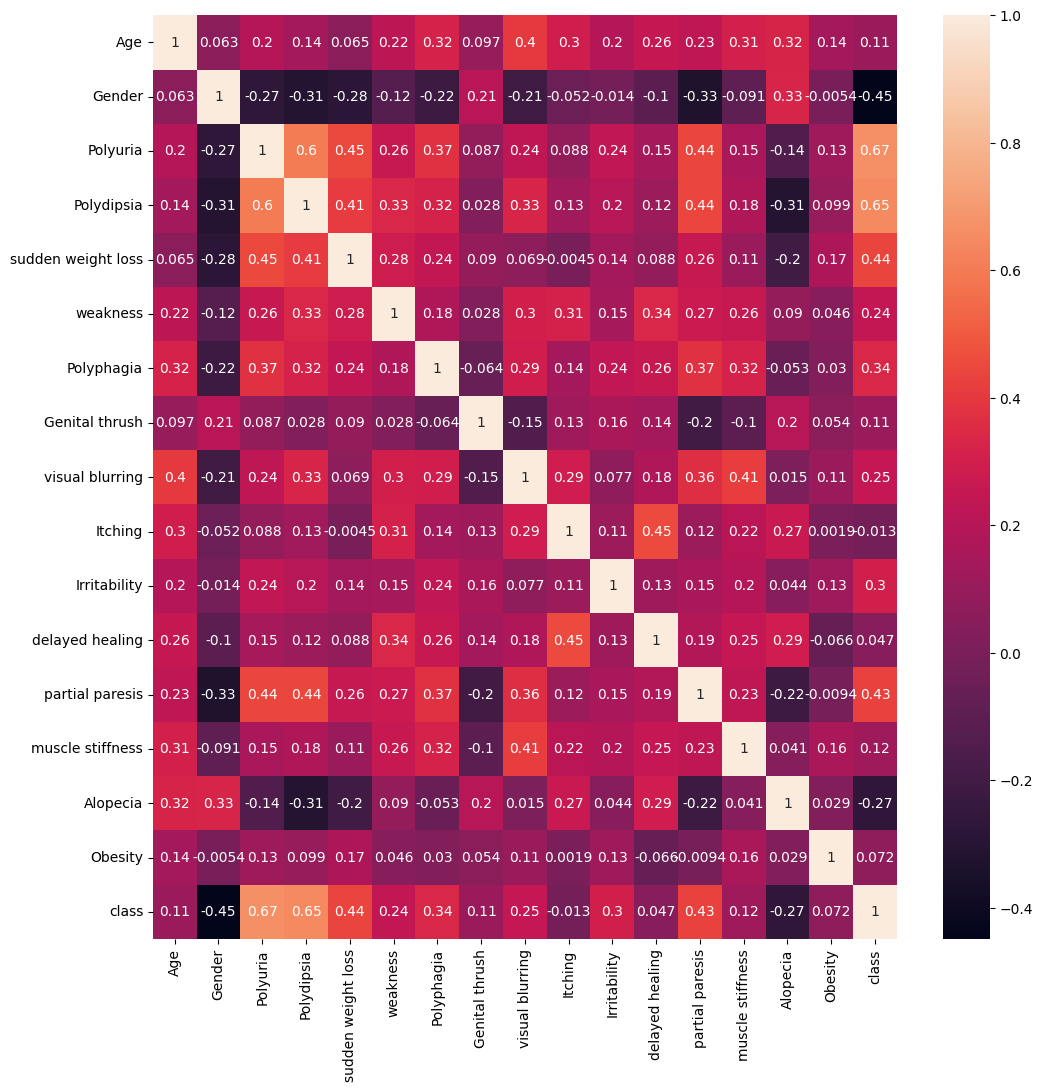

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Gender'>

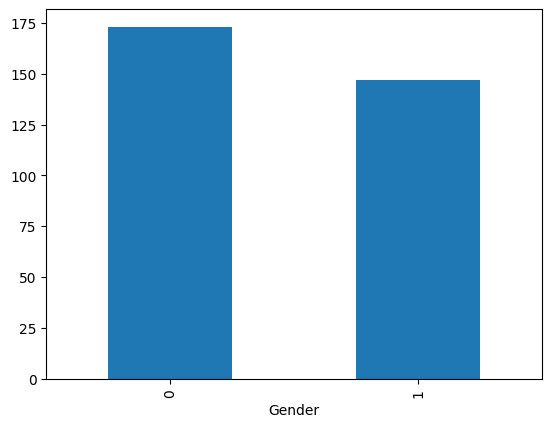

In [15]:
df.groupby('Gender').sum()['class'].plot(kind='bar')

In [16]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Data Splitting

In [17]:
x=df.drop(['class'],axis=1)

In [18]:
y=df['class']

In [19]:
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32

# Train-Test Splitting

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((416, 16), (104, 16), (416,), (104,))

# Feature Importance

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [26]:
col=['Age','Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
feature_imp=pd.Series(model.feature_importances_,index=col)
feature_imp.sort_values(ascending=True)

Obesity               0.023923
weakness              0.025502
muscle stiffness      0.026309
Genital thrush        0.026641
Itching               0.028872
Alopecia              0.030607
visual blurring       0.034120
Polyphagia            0.034142
delayed healing       0.035059
Irritability          0.038431
Age                   0.048513
sudden weight loss    0.053345
partial paresis       0.058342
Gender                0.079300
Polydipsia            0.182748
Polyuria              0.274145
dtype: float64

<AxesSubplot:>

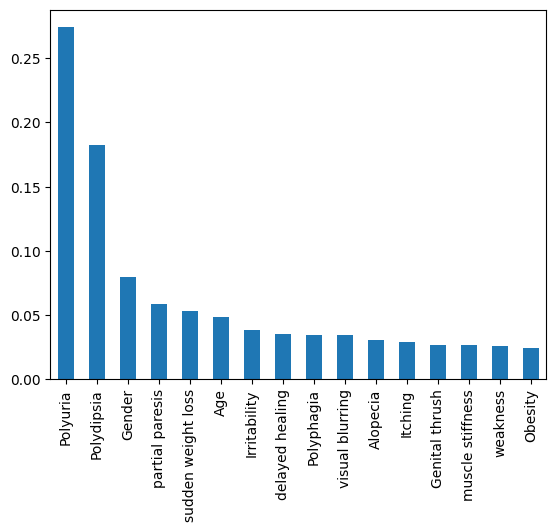

In [27]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

### Polyuria and Polydipsia are most important symptoms of diabete

# Catboost Model Training

In [29]:
train_data=cb.Pool(xtrain,ytrain)
model1=cb.CatBoostClassifier()
grid={
    'iterations':[100,110],
    'learning_rate':[0.03,0.1],
    'depth':[2,4,6,8],
    'max_bin':[150,300],
}
model1.grid_search(grid,train_data)


0:	learn: 0.6555531	test: 0.6550695	best: 0.6550695 (0)	total: 133ms	remaining: 13.1s
1:	learn: 0.6218047	test: 0.6208337	best: 0.6208337 (1)	total: 134ms	remaining: 6.56s
2:	learn: 0.6028444	test: 0.5999680	best: 0.5999680 (2)	total: 135ms	remaining: 4.36s
3:	learn: 0.5794220	test: 0.5784762	best: 0.5784762 (3)	total: 136ms	remaining: 3.26s
4:	learn: 0.5581330	test: 0.5589990	best: 0.5589990 (4)	total: 137ms	remaining: 2.6s
5:	learn: 0.5388363	test: 0.5413552	best: 0.5413552 (5)	total: 137ms	remaining: 2.15s
6:	learn: 0.5194817	test: 0.5219420	best: 0.5219420 (6)	total: 138ms	remaining: 1.84s
7:	learn: 0.4987863	test: 0.5004619	best: 0.5004619 (7)	total: 139ms	remaining: 1.6s
8:	learn: 0.4872174	test: 0.4871248	best: 0.4871248 (8)	total: 140ms	remaining: 1.42s
9:	learn: 0.4755477	test: 0.4746240	best: 0.4746240 (9)	total: 141ms	remaining: 1.27s
10:	learn: 0.4637484	test: 0.4612102	best: 0.4612102 (10)	total: 142ms	remaining: 1.15s
11:	learn: 0.4532017	test: 0.4516882	best: 0.4516882 (

13:	learn: 0.4332214	test: 0.4319819	best: 0.4319819 (13)	total: 15.3ms	remaining: 105ms
14:	learn: 0.4267690	test: 0.4245535	best: 0.4245535 (14)	total: 16.5ms	remaining: 105ms
15:	learn: 0.4165201	test: 0.4153794	best: 0.4153794 (15)	total: 17.5ms	remaining: 103ms
16:	learn: 0.4067294	test: 0.4053952	best: 0.4053952 (16)	total: 18.4ms	remaining: 101ms
17:	learn: 0.3977902	test: 0.3962351	best: 0.3962351 (17)	total: 19.3ms	remaining: 98.4ms
18:	learn: 0.3915629	test: 0.3897135	best: 0.3897135 (18)	total: 20ms	remaining: 95.9ms
19:	learn: 0.3837832	test: 0.3828134	best: 0.3828134 (19)	total: 20.8ms	remaining: 93.6ms
20:	learn: 0.3777977	test: 0.3761225	best: 0.3761225 (20)	total: 21.6ms	remaining: 91.3ms
21:	learn: 0.3708284	test: 0.3699720	best: 0.3699720 (21)	total: 22.3ms	remaining: 89.1ms
22:	learn: 0.3640683	test: 0.3629769	best: 0.3629769 (22)	total: 23ms	remaining: 87ms
23:	learn: 0.3578598	test: 0.3565203	best: 0.3565203 (23)	total: 23.7ms	remaining: 85ms
24:	learn: 0.3556967	t

18:	learn: 0.3368013	test: 0.3356756	best: 0.3356756 (18)	total: 23.2ms	remaining: 99ms
19:	learn: 0.3274652	test: 0.3266619	best: 0.3266619 (19)	total: 25ms	remaining: 99.9ms
20:	learn: 0.3176006	test: 0.3184588	best: 0.3184588 (20)	total: 26.7ms	remaining: 100ms
21:	learn: 0.3097168	test: 0.3116413	best: 0.3116413 (21)	total: 27.8ms	remaining: 98.5ms
22:	learn: 0.3019285	test: 0.3051312	best: 0.3051312 (22)	total: 28.8ms	remaining: 96.3ms
23:	learn: 0.2933644	test: 0.2977946	best: 0.2977946 (23)	total: 29.8ms	remaining: 94.3ms
24:	learn: 0.2856594	test: 0.2883445	best: 0.2883445 (24)	total: 30.8ms	remaining: 92.3ms
25:	learn: 0.2793596	test: 0.2830775	best: 0.2830775 (25)	total: 31.7ms	remaining: 90.4ms
26:	learn: 0.2740658	test: 0.2771756	best: 0.2771756 (26)	total: 32.8ms	remaining: 88.6ms
27:	learn: 0.2692837	test: 0.2729780	best: 0.2729780 (27)	total: 33.8ms	remaining: 86.9ms
28:	learn: 0.2635857	test: 0.2680977	best: 0.2680977 (28)	total: 34.8ms	remaining: 85.1ms
29:	learn: 0.25

74:	learn: 0.0400882	test: 0.0943949	best: 0.0943949 (74)	total: 94.3ms	remaining: 31.4ms
75:	learn: 0.0399428	test: 0.0942873	best: 0.0942873 (75)	total: 95.7ms	remaining: 30.2ms
76:	learn: 0.0389743	test: 0.0918455	best: 0.0918455 (76)	total: 97.4ms	remaining: 29.1ms
77:	learn: 0.0381056	test: 0.0913416	best: 0.0913416 (77)	total: 98.8ms	remaining: 27.9ms
78:	learn: 0.0369016	test: 0.0893081	best: 0.0893081 (78)	total: 99.9ms	remaining: 26.5ms
79:	learn: 0.0364936	test: 0.0893085	best: 0.0893081 (78)	total: 101ms	remaining: 25.2ms
80:	learn: 0.0359658	test: 0.0875822	best: 0.0875822 (80)	total: 102ms	remaining: 23.9ms
81:	learn: 0.0356076	test: 0.0865108	best: 0.0865108 (81)	total: 103ms	remaining: 22.6ms
82:	learn: 0.0350031	test: 0.0860412	best: 0.0860412 (82)	total: 104ms	remaining: 21.3ms
83:	learn: 0.0346856	test: 0.0858632	best: 0.0858632 (83)	total: 105ms	remaining: 20ms
84:	learn: 0.0342421	test: 0.0851326	best: 0.0851326 (84)	total: 106ms	remaining: 18.7ms
85:	learn: 0.03354

106:	learn: 0.1085608	test: 0.1431417	best: 0.1431417 (106)	total: 157ms	remaining: 4.41ms
107:	learn: 0.1079327	test: 0.1424069	best: 0.1424069 (107)	total: 159ms	remaining: 2.94ms
108:	learn: 0.1066835	test: 0.1414962	best: 0.1414962 (108)	total: 160ms	remaining: 1.47ms
109:	learn: 0.1057795	test: 0.1415024	best: 0.1414962 (108)	total: 161ms	remaining: 0us

bestTest = 0.1414962243
bestIteration = 108

6:	loss: 0.1414962	best: 0.0789043 (5)	total: 1.06s	remaining: 3.78s
0:	learn: 0.5774260	test: 0.5713428	best: 0.5713428 (0)	total: 1.66ms	remaining: 181ms
1:	learn: 0.4782037	test: 0.4719160	best: 0.4719160 (1)	total: 2.91ms	remaining: 157ms
2:	learn: 0.4151986	test: 0.4182286	best: 0.4182286 (2)	total: 4.05ms	remaining: 144ms
3:	learn: 0.3665198	test: 0.3761858	best: 0.3761858 (3)	total: 5.13ms	remaining: 136ms
4:	learn: 0.3329190	test: 0.3448281	best: 0.3448281 (4)	total: 6.22ms	remaining: 131ms
5:	learn: 0.3040124	test: 0.3180157	best: 0.3180157 (5)	total: 7.3ms	remaining: 127ms
6:	

12:	learn: 0.3754030	test: 0.3876352	best: 0.3876352 (12)	total: 32ms	remaining: 214ms
13:	learn: 0.3633067	test: 0.3741534	best: 0.3741534 (13)	total: 34.3ms	remaining: 211ms
14:	learn: 0.3517374	test: 0.3618400	best: 0.3618400 (14)	total: 36.4ms	remaining: 206ms
15:	learn: 0.3397897	test: 0.3519459	best: 0.3519459 (15)	total: 38.1ms	remaining: 200ms
16:	learn: 0.3273016	test: 0.3416934	best: 0.3416934 (16)	total: 40ms	remaining: 195ms
17:	learn: 0.3160858	test: 0.3338902	best: 0.3338902 (17)	total: 41.7ms	remaining: 190ms
18:	learn: 0.3057246	test: 0.3226869	best: 0.3226869 (18)	total: 43.4ms	remaining: 185ms
19:	learn: 0.2987263	test: 0.3161594	best: 0.3161594 (19)	total: 45.4ms	remaining: 181ms
20:	learn: 0.2894241	test: 0.3077627	best: 0.3077627 (20)	total: 47.2ms	remaining: 177ms
21:	learn: 0.2806636	test: 0.3004121	best: 0.3004121 (21)	total: 48.8ms	remaining: 173ms
22:	learn: 0.2717755	test: 0.2937092	best: 0.2937092 (22)	total: 50.3ms	remaining: 169ms
23:	learn: 0.2646363	test

94:	learn: 0.0149959	test: 0.0606166	best: 0.0605672 (93)	total: 170ms	remaining: 8.93ms
95:	learn: 0.0147163	test: 0.0609382	best: 0.0605672 (93)	total: 172ms	remaining: 7.15ms
96:	learn: 0.0144867	test: 0.0610512	best: 0.0605672 (93)	total: 173ms	remaining: 5.36ms
97:	learn: 0.0143550	test: 0.0609777	best: 0.0605672 (93)	total: 175ms	remaining: 3.58ms
98:	learn: 0.0141249	test: 0.0611510	best: 0.0605672 (93)	total: 177ms	remaining: 1.79ms
99:	learn: 0.0138642	test: 0.0602785	best: 0.0602785 (99)	total: 178ms	remaining: 0us

bestTest = 0.06027845794
bestIteration = 99

9:	loss: 0.0602785	best: 0.0602785 (9)	total: 1.67s	remaining: 3.68s
0:	learn: 0.6577512	test: 0.6568628	best: 0.6568628 (0)	total: 2.2ms	remaining: 240ms
1:	learn: 0.6239542	test: 0.6245474	best: 0.6245474 (1)	total: 4.51ms	remaining: 244ms
2:	learn: 0.5914399	test: 0.5926834	best: 0.5926834 (2)	total: 6.27ms	remaining: 224ms
3:	learn: 0.5600167	test: 0.5618781	best: 0.5618781 (3)	total: 8.37ms	remaining: 222ms
4:	lear

61:	learn: 0.0291550	test: 0.0731508	best: 0.0731508 (61)	total: 107ms	remaining: 82.6ms
62:	learn: 0.0284343	test: 0.0721830	best: 0.0721830 (62)	total: 108ms	remaining: 80.9ms
63:	learn: 0.0275159	test: 0.0722317	best: 0.0721830 (62)	total: 110ms	remaining: 79ms
64:	learn: 0.0268973	test: 0.0725094	best: 0.0721830 (62)	total: 111ms	remaining: 77.1ms
65:	learn: 0.0262718	test: 0.0724651	best: 0.0721830 (62)	total: 113ms	remaining: 75.2ms
66:	learn: 0.0256042	test: 0.0713127	best: 0.0713127 (66)	total: 114ms	remaining: 73.3ms
67:	learn: 0.0250494	test: 0.0707243	best: 0.0707243 (67)	total: 116ms	remaining: 71.4ms
68:	learn: 0.0246111	test: 0.0706019	best: 0.0706019 (68)	total: 117ms	remaining: 69.6ms
69:	learn: 0.0241080	test: 0.0698985	best: 0.0698985 (69)	total: 119ms	remaining: 67.8ms
70:	learn: 0.0235626	test: 0.0687261	best: 0.0687261 (70)	total: 120ms	remaining: 65.9ms
71:	learn: 0.0232074	test: 0.0686335	best: 0.0686335 (71)	total: 122ms	remaining: 64.1ms
72:	learn: 0.0228383	te

0:	learn: 0.5891818	test: 0.5940947	best: 0.5940947 (0)	total: 5.74ms	remaining: 568ms
1:	learn: 0.5062656	test: 0.5154302	best: 0.5154302 (1)	total: 7.47ms	remaining: 366ms
2:	learn: 0.4255110	test: 0.4345968	best: 0.4345968 (2)	total: 9.31ms	remaining: 301ms
3:	learn: 0.3662762	test: 0.3780039	best: 0.3780039 (3)	total: 12.1ms	remaining: 291ms
4:	learn: 0.3247897	test: 0.3363034	best: 0.3363034 (4)	total: 15.1ms	remaining: 287ms
5:	learn: 0.2921919	test: 0.3033394	best: 0.3033394 (5)	total: 17.1ms	remaining: 268ms
6:	learn: 0.2597420	test: 0.2788548	best: 0.2788548 (6)	total: 20.1ms	remaining: 267ms
7:	learn: 0.2308009	test: 0.2534972	best: 0.2534972 (7)	total: 22.9ms	remaining: 264ms
8:	learn: 0.2064537	test: 0.2378745	best: 0.2378745 (8)	total: 26.2ms	remaining: 265ms
9:	learn: 0.1884418	test: 0.2239760	best: 0.2239760 (9)	total: 29.2ms	remaining: 263ms
10:	learn: 0.1720156	test: 0.2102750	best: 0.2102750 (10)	total: 32.2ms	remaining: 260ms
11:	learn: 0.1592649	test: 0.1982382	best

27:	learn: 0.2286961	test: 0.2479285	best: 0.2479285 (27)	total: 86.9ms	remaining: 255ms
28:	learn: 0.2218004	test: 0.2436932	best: 0.2436932 (28)	total: 89.9ms	remaining: 251ms
29:	learn: 0.2149154	test: 0.2373220	best: 0.2373220 (29)	total: 92.7ms	remaining: 247ms
30:	learn: 0.2086177	test: 0.2318870	best: 0.2318870 (30)	total: 95.7ms	remaining: 244ms
31:	learn: 0.2040454	test: 0.2286078	best: 0.2286078 (31)	total: 98.4ms	remaining: 240ms
32:	learn: 0.1982573	test: 0.2229025	best: 0.2229025 (32)	total: 101ms	remaining: 236ms
33:	learn: 0.1933215	test: 0.2187727	best: 0.2187727 (33)	total: 104ms	remaining: 232ms
34:	learn: 0.1873850	test: 0.2133446	best: 0.2133446 (34)	total: 106ms	remaining: 226ms
35:	learn: 0.1813762	test: 0.2078606	best: 0.2078606 (35)	total: 108ms	remaining: 223ms
36:	learn: 0.1770813	test: 0.2050220	best: 0.2050220 (36)	total: 111ms	remaining: 220ms
37:	learn: 0.1731072	test: 0.2016066	best: 0.2016066 (37)	total: 115ms	remaining: 217ms
38:	learn: 0.1687247	test: 

48:	learn: 0.0312375	test: 0.0730653	best: 0.0729797 (47)	total: 154ms	remaining: 192ms
49:	learn: 0.0304362	test: 0.0718427	best: 0.0718427 (49)	total: 157ms	remaining: 189ms
50:	learn: 0.0299798	test: 0.0709763	best: 0.0709763 (50)	total: 161ms	remaining: 186ms
51:	learn: 0.0294394	test: 0.0703097	best: 0.0703097 (51)	total: 165ms	remaining: 184ms
52:	learn: 0.0289630	test: 0.0696921	best: 0.0696921 (52)	total: 168ms	remaining: 181ms
53:	learn: 0.0278181	test: 0.0673362	best: 0.0673362 (53)	total: 172ms	remaining: 178ms
54:	learn: 0.0271614	test: 0.0667205	best: 0.0667205 (54)	total: 177ms	remaining: 177ms
55:	learn: 0.0266930	test: 0.0662742	best: 0.0662742 (55)	total: 180ms	remaining: 174ms
56:	learn: 0.0257982	test: 0.0656264	best: 0.0656264 (56)	total: 185ms	remaining: 172ms
57:	learn: 0.0253561	test: 0.0650672	best: 0.0650672 (57)	total: 189ms	remaining: 169ms
58:	learn: 0.0249223	test: 0.0647880	best: 0.0647880 (58)	total: 192ms	remaining: 166ms
59:	learn: 0.0241634	test: 0.062

27:	learn: 0.2201735	test: 0.2285787	best: 0.2285787 (27)	total: 30.7ms	remaining: 79ms
28:	learn: 0.2145238	test: 0.2267418	best: 0.2267418 (28)	total: 31.7ms	remaining: 77.7ms
29:	learn: 0.2107404	test: 0.2222017	best: 0.2222017 (29)	total: 32.7ms	remaining: 76.3ms
30:	learn: 0.2077922	test: 0.2192004	best: 0.2192004 (30)	total: 33.6ms	remaining: 74.9ms
31:	learn: 0.2050647	test: 0.2172077	best: 0.2172077 (31)	total: 34.5ms	remaining: 73.3ms
32:	learn: 0.2028783	test: 0.2157385	best: 0.2157385 (32)	total: 35.4ms	remaining: 71.8ms
33:	learn: 0.2015837	test: 0.2135022	best: 0.2135022 (33)	total: 36.3ms	remaining: 70.4ms
34:	learn: 0.2005222	test: 0.2143078	best: 0.2135022 (33)	total: 37.3ms	remaining: 69.2ms
35:	learn: 0.1979321	test: 0.2125344	best: 0.2125344 (35)	total: 38.6ms	remaining: 68.7ms
36:	learn: 0.1955663	test: 0.2113791	best: 0.2113791 (36)	total: 40.3ms	remaining: 68.6ms
37:	learn: 0.1918215	test: 0.2072110	best: 0.2072110 (37)	total: 41.3ms	remaining: 67.4ms
38:	learn: 0

18:	loss: 0.2178336	best: 0.0504159 (15)	total: 3.91s	remaining: 2.67s
0:	learn: 0.5789550	test: 0.5771721	best: 0.5771721 (0)	total: 1.18ms	remaining: 129ms
1:	learn: 0.5014333	test: 0.4978509	best: 0.4978509 (1)	total: 2.21ms	remaining: 119ms
2:	learn: 0.4675415	test: 0.4582699	best: 0.4582699 (2)	total: 3.17ms	remaining: 113ms
3:	learn: 0.4261899	test: 0.4212752	best: 0.4212752 (3)	total: 4.17ms	remaining: 111ms
4:	learn: 0.4027575	test: 0.4015323	best: 0.4015323 (4)	total: 5.13ms	remaining: 108ms
5:	learn: 0.3780436	test: 0.3799671	best: 0.3799671 (5)	total: 6.06ms	remaining: 105ms
6:	learn: 0.3549026	test: 0.3560281	best: 0.3560281 (6)	total: 7ms	remaining: 103ms
7:	learn: 0.3388011	test: 0.3406011	best: 0.3406011 (7)	total: 7.94ms	remaining: 101ms
8:	learn: 0.3227445	test: 0.3203567	best: 0.3203567 (8)	total: 8.88ms	remaining: 99.7ms
9:	learn: 0.3119542	test: 0.3074509	best: 0.3074509 (9)	total: 9.82ms	remaining: 98.2ms
10:	learn: 0.3022910	test: 0.2993984	best: 0.2993984 (10)	to

67:	learn: 0.1551927	test: 0.1750224	best: 0.1750224 (67)	total: 88ms	remaining: 41.4ms
68:	learn: 0.1536273	test: 0.1744343	best: 0.1744343 (68)	total: 90.2ms	remaining: 40.5ms
69:	learn: 0.1519942	test: 0.1732491	best: 0.1732491 (69)	total: 91.6ms	remaining: 39.2ms
70:	learn: 0.1499729	test: 0.1722438	best: 0.1722438 (70)	total: 92.8ms	remaining: 37.9ms
71:	learn: 0.1482355	test: 0.1704134	best: 0.1704134 (71)	total: 94ms	remaining: 36.6ms
72:	learn: 0.1467252	test: 0.1697798	best: 0.1697798 (72)	total: 95.1ms	remaining: 35.2ms
73:	learn: 0.1448587	test: 0.1698974	best: 0.1697798 (72)	total: 96.2ms	remaining: 33.8ms
74:	learn: 0.1429720	test: 0.1679203	best: 0.1679203 (74)	total: 97.3ms	remaining: 32.4ms
75:	learn: 0.1411895	test: 0.1665685	best: 0.1665685 (75)	total: 98.5ms	remaining: 31.1ms
76:	learn: 0.1397081	test: 0.1659704	best: 0.1659704 (76)	total: 99.6ms	remaining: 29.8ms
77:	learn: 0.1383504	test: 0.1657907	best: 0.1657907 (77)	total: 101ms	remaining: 28.4ms
78:	learn: 0.13

16:	learn: 0.3505089	test: 0.3499855	best: 0.3499855 (16)	total: 20.4ms	remaining: 111ms
17:	learn: 0.3433202	test: 0.3434949	best: 0.3434949 (17)	total: 21.9ms	remaining: 112ms
18:	learn: 0.3368013	test: 0.3356756	best: 0.3356756 (18)	total: 23.4ms	remaining: 112ms
19:	learn: 0.3274652	test: 0.3266619	best: 0.3266619 (19)	total: 24.5ms	remaining: 110ms
20:	learn: 0.3176006	test: 0.3184588	best: 0.3184588 (20)	total: 25.7ms	remaining: 109ms
21:	learn: 0.3097168	test: 0.3116413	best: 0.3116413 (21)	total: 26.8ms	remaining: 107ms
22:	learn: 0.3019285	test: 0.3051312	best: 0.3051312 (22)	total: 27.9ms	remaining: 105ms
23:	learn: 0.2933644	test: 0.2977946	best: 0.2977946 (23)	total: 29ms	remaining: 104ms
24:	learn: 0.2856594	test: 0.2883445	best: 0.2883445 (24)	total: 30ms	remaining: 102ms
25:	learn: 0.2793596	test: 0.2830775	best: 0.2830775 (25)	total: 31.2ms	remaining: 101ms
26:	learn: 0.2740658	test: 0.2771756	best: 0.2771756 (26)	total: 32.4ms	remaining: 99.5ms
27:	learn: 0.2692837	tes

45:	learn: 0.0706502	test: 0.1126194	best: 0.1126194 (45)	total: 69.1ms	remaining: 96.1ms
46:	learn: 0.0691963	test: 0.1120125	best: 0.1120125 (46)	total: 70.5ms	remaining: 94.5ms
47:	learn: 0.0673518	test: 0.1121196	best: 0.1120125 (46)	total: 71.8ms	remaining: 92.7ms
48:	learn: 0.0652687	test: 0.1119003	best: 0.1119003 (48)	total: 73ms	remaining: 90.9ms
49:	learn: 0.0642719	test: 0.1119553	best: 0.1119003 (48)	total: 74.3ms	remaining: 89.1ms
50:	learn: 0.0636713	test: 0.1111605	best: 0.1111605 (50)	total: 75.5ms	remaining: 87.4ms
51:	learn: 0.0631597	test: 0.1110132	best: 0.1110132 (51)	total: 76.9ms	remaining: 85.7ms
52:	learn: 0.0621066	test: 0.1092906	best: 0.1092906 (52)	total: 78.1ms	remaining: 84ms
53:	learn: 0.0606050	test: 0.1077131	best: 0.1077131 (53)	total: 79.4ms	remaining: 82.4ms
54:	learn: 0.0600597	test: 0.1083949	best: 0.1077131 (53)	total: 80.7ms	remaining: 80.7ms
55:	learn: 0.0584133	test: 0.1056236	best: 0.1056236 (55)	total: 81.9ms	remaining: 79ms
56:	learn: 0.057

53:	learn: 0.1297196	test: 0.1684775	best: 0.1684775 (53)	total: 116ms	remaining: 99ms
54:	learn: 0.1275317	test: 0.1666492	best: 0.1666492 (54)	total: 118ms	remaining: 96.7ms
55:	learn: 0.1255281	test: 0.1656484	best: 0.1656484 (55)	total: 120ms	remaining: 94.4ms
56:	learn: 0.1236071	test: 0.1634331	best: 0.1634331 (56)	total: 122ms	remaining: 92ms
57:	learn: 0.1218553	test: 0.1613320	best: 0.1613320 (57)	total: 124ms	remaining: 89.5ms
58:	learn: 0.1198823	test: 0.1589760	best: 0.1589760 (58)	total: 125ms	remaining: 86.9ms
59:	learn: 0.1182743	test: 0.1570241	best: 0.1570241 (59)	total: 127ms	remaining: 84.5ms
60:	learn: 0.1163811	test: 0.1557160	best: 0.1557160 (60)	total: 129ms	remaining: 82.2ms
61:	learn: 0.1154242	test: 0.1549858	best: 0.1549858 (61)	total: 130ms	remaining: 79.5ms
62:	learn: 0.1135940	test: 0.1538970	best: 0.1538970 (62)	total: 131ms	remaining: 77.2ms
63:	learn: 0.1118841	test: 0.1514704	best: 0.1514704 (63)	total: 133ms	remaining: 74.9ms
64:	learn: 0.1102791	test

56:	learn: 0.0328888	test: 0.0771916	best: 0.0771916 (56)	total: 112ms	remaining: 84.3ms
57:	learn: 0.0317948	test: 0.0746876	best: 0.0746876 (57)	total: 114ms	remaining: 82.3ms
58:	learn: 0.0310615	test: 0.0740708	best: 0.0740708 (58)	total: 115ms	remaining: 80.2ms
59:	learn: 0.0300383	test: 0.0740062	best: 0.0740062 (59)	total: 117ms	remaining: 78.1ms
60:	learn: 0.0298807	test: 0.0739477	best: 0.0739477 (60)	total: 118ms	remaining: 75.7ms
61:	learn: 0.0291550	test: 0.0731508	best: 0.0731508 (61)	total: 120ms	remaining: 73.6ms
62:	learn: 0.0284343	test: 0.0721830	best: 0.0721830 (62)	total: 122ms	remaining: 71.7ms
63:	learn: 0.0275159	test: 0.0722317	best: 0.0721830 (62)	total: 124ms	remaining: 69.7ms
64:	learn: 0.0268973	test: 0.0725094	best: 0.0721830 (62)	total: 126ms	remaining: 67.8ms
65:	learn: 0.0262718	test: 0.0724651	best: 0.0721830 (62)	total: 128ms	remaining: 65.9ms
66:	learn: 0.0256042	test: 0.0713127	best: 0.0713127 (66)	total: 130ms	remaining: 64.1ms
67:	learn: 0.0250494	

48:	learn: 0.1433436	test: 0.1795408	best: 0.1795408 (48)	total: 113ms	remaining: 140ms
49:	learn: 0.1402615	test: 0.1767854	best: 0.1767854 (49)	total: 115ms	remaining: 137ms
50:	learn: 0.1376085	test: 0.1746449	best: 0.1746449 (50)	total: 116ms	remaining: 135ms
51:	learn: 0.1346781	test: 0.1727985	best: 0.1727985 (51)	total: 118ms	remaining: 132ms
52:	learn: 0.1320058	test: 0.1700704	best: 0.1700704 (52)	total: 120ms	remaining: 129ms
53:	learn: 0.1297196	test: 0.1684775	best: 0.1684775 (53)	total: 122ms	remaining: 126ms
54:	learn: 0.1275317	test: 0.1666492	best: 0.1666492 (54)	total: 123ms	remaining: 123ms
55:	learn: 0.1255281	test: 0.1656484	best: 0.1656484 (55)	total: 125ms	remaining: 121ms
56:	learn: 0.1236071	test: 0.1634331	best: 0.1634331 (56)	total: 127ms	remaining: 118ms
57:	learn: 0.1218553	test: 0.1613320	best: 0.1613320 (57)	total: 129ms	remaining: 115ms
58:	learn: 0.1198823	test: 0.1589760	best: 0.1589760 (58)	total: 130ms	remaining: 112ms
59:	learn: 0.1182743	test: 0.157

54:	learn: 0.0340625	test: 0.0783962	best: 0.0783962 (54)	total: 98.4ms	remaining: 98.4ms
55:	learn: 0.0334290	test: 0.0776031	best: 0.0776031 (55)	total: 100ms	remaining: 96.8ms
56:	learn: 0.0328888	test: 0.0771916	best: 0.0771916 (56)	total: 102ms	remaining: 95ms
57:	learn: 0.0317948	test: 0.0746876	best: 0.0746876 (57)	total: 104ms	remaining: 93.1ms
58:	learn: 0.0310615	test: 0.0740708	best: 0.0740708 (58)	total: 106ms	remaining: 91.3ms
59:	learn: 0.0300383	test: 0.0740062	best: 0.0740062 (59)	total: 107ms	remaining: 89.4ms
60:	learn: 0.0298807	test: 0.0739477	best: 0.0739477 (60)	total: 108ms	remaining: 87.1ms
61:	learn: 0.0291550	test: 0.0731508	best: 0.0731508 (61)	total: 110ms	remaining: 85.2ms
62:	learn: 0.0284343	test: 0.0721830	best: 0.0721830 (62)	total: 112ms	remaining: 83.3ms
63:	learn: 0.0275159	test: 0.0722317	best: 0.0721830 (62)	total: 113ms	remaining: 81.5ms
64:	learn: 0.0268973	test: 0.0725094	best: 0.0721830 (62)	total: 115ms	remaining: 79.7ms
65:	learn: 0.0262718	t

95:	learn: 0.0661126	test: 0.1071689	best: 0.1071689 (95)	total: 304ms	remaining: 12.6ms
96:	learn: 0.0652930	test: 0.1063320	best: 0.1063320 (96)	total: 307ms	remaining: 9.48ms
97:	learn: 0.0641002	test: 0.1052919	best: 0.1052919 (97)	total: 310ms	remaining: 6.33ms
98:	learn: 0.0633244	test: 0.1042002	best: 0.1042002 (98)	total: 311ms	remaining: 3.15ms
99:	learn: 0.0622826	test: 0.1028955	best: 0.1028955 (99)	total: 315ms	remaining: 0us

bestTest = 0.1028955196
bestIteration = 99

28:	loss: 0.1028955	best: 0.0504159 (15)	total: 5.8s	remaining: 600ms
0:	learn: 0.5891818	test: 0.5940947	best: 0.5940947 (0)	total: 3.76ms	remaining: 373ms
1:	learn: 0.5062656	test: 0.5154302	best: 0.5154302 (1)	total: 5.77ms	remaining: 283ms
2:	learn: 0.4255110	test: 0.4345968	best: 0.4345968 (2)	total: 8.26ms	remaining: 267ms
3:	learn: 0.3662762	test: 0.3780039	best: 0.3780039 (3)	total: 11.7ms	remaining: 281ms
4:	learn: 0.3247897	test: 0.3363034	best: 0.3363034 (4)	total: 15.3ms	remaining: 292ms
5:	learn

3:	learn: 0.5639473	test: 0.5686054	best: 0.5686054 (3)	total: 19ms	remaining: 503ms
4:	learn: 0.5404431	test: 0.5459162	best: 0.5459162 (4)	total: 22.1ms	remaining: 463ms
5:	learn: 0.5180953	test: 0.5271976	best: 0.5271976 (5)	total: 26ms	remaining: 451ms
6:	learn: 0.4991138	test: 0.5080190	best: 0.5080190 (6)	total: 28ms	remaining: 413ms
7:	learn: 0.4778218	test: 0.4914315	best: 0.4914315 (7)	total: 34ms	remaining: 433ms
8:	learn: 0.4548475	test: 0.4671055	best: 0.4671055 (8)	total: 36.7ms	remaining: 412ms
9:	learn: 0.4365637	test: 0.4512605	best: 0.4512605 (9)	total: 40.3ms	remaining: 403ms
10:	learn: 0.4189975	test: 0.4327974	best: 0.4327974 (10)	total: 42ms	remaining: 378ms
11:	learn: 0.3991231	test: 0.4127297	best: 0.4127297 (11)	total: 43.1ms	remaining: 352ms
12:	learn: 0.3820191	test: 0.3968509	best: 0.3968509 (12)	total: 46.6ms	remaining: 348ms
13:	learn: 0.3658148	test: 0.3815905	best: 0.3815905 (13)	total: 48.8ms	remaining: 335ms
14:	learn: 0.3544221	test: 0.3715889	best: 0.

11:	learn: 0.1592649	test: 0.1982382	best: 0.1982382 (11)	total: 37.7ms	remaining: 308ms
12:	learn: 0.1448995	test: 0.1834546	best: 0.1834546 (12)	total: 41.2ms	remaining: 308ms
13:	learn: 0.1339401	test: 0.1758913	best: 0.1758913 (13)	total: 44.4ms	remaining: 304ms
14:	learn: 0.1246168	test: 0.1675501	best: 0.1675501 (14)	total: 47.6ms	remaining: 301ms
15:	learn: 0.1152339	test: 0.1595734	best: 0.1595734 (15)	total: 50.9ms	remaining: 299ms
16:	learn: 0.1107480	test: 0.1526118	best: 0.1526118 (16)	total: 51.8ms	remaining: 283ms
17:	learn: 0.1039026	test: 0.1438346	best: 0.1438346 (17)	total: 52.8ms	remaining: 270ms
18:	learn: 0.0982371	test: 0.1382505	best: 0.1382505 (18)	total: 56ms	remaining: 268ms
19:	learn: 0.0932148	test: 0.1331604	best: 0.1331604 (19)	total: 59.1ms	remaining: 266ms
20:	learn: 0.0883293	test: 0.1268342	best: 0.1268342 (20)	total: 62.1ms	remaining: 263ms
21:	learn: 0.0839361	test: 0.1209488	best: 0.1209488 (21)	total: 65.2ms	remaining: 261ms
22:	learn: 0.0789766	te

8:	learn: 0.2095984	test: 0.3081143	best: 0.3081143 (8)	total: 27.2ms	remaining: 305ms
9:	learn: 0.1900994	test: 0.2940894	best: 0.2940894 (9)	total: 31.4ms	remaining: 314ms
10:	learn: 0.1716587	test: 0.2801314	best: 0.2801314 (10)	total: 34.2ms	remaining: 308ms
11:	learn: 0.1609538	test: 0.2661330	best: 0.2661330 (11)	total: 35.5ms	remaining: 290ms
12:	learn: 0.1495123	test: 0.2573827	best: 0.2573827 (12)	total: 40.2ms	remaining: 300ms
13:	learn: 0.1378554	test: 0.2446754	best: 0.2446754 (13)	total: 46.1ms	remaining: 316ms
14:	learn: 0.1279001	test: 0.2359475	best: 0.2359475 (14)	total: 50.5ms	remaining: 320ms
15:	learn: 0.1198742	test: 0.2292729	best: 0.2292729 (15)	total: 56.9ms	remaining: 334ms
16:	learn: 0.1117584	test: 0.2246365	best: 0.2246365 (16)	total: 61.9ms	remaining: 339ms
17:	learn: 0.1057890	test: 0.2181549	best: 0.2181549 (17)	total: 67.1ms	remaining: 343ms
18:	learn: 0.0992369	test: 0.2132670	best: 0.2132670 (18)	total: 72.4ms	remaining: 347ms
19:	learn: 0.0929840	test

0:	learn: 0.5707415	test: 0.5973366	best: 0.5973366 (0)	total: 1.12ms	remaining: 122ms
1:	learn: 0.4964837	test: 0.5391006	best: 0.5391006 (1)	total: 3.58ms	remaining: 193ms
2:	learn: 0.4383585	test: 0.4987775	best: 0.4987775 (2)	total: 5.54ms	remaining: 198ms
3:	learn: 0.3804917	test: 0.4521035	best: 0.4521035 (3)	total: 10.6ms	remaining: 282ms
4:	learn: 0.3348763	test: 0.4157357	best: 0.4157357 (4)	total: 13.8ms	remaining: 291ms
5:	learn: 0.3015030	test: 0.3921095	best: 0.3921095 (5)	total: 17.3ms	remaining: 301ms
6:	learn: 0.2704015	test: 0.3680569	best: 0.3680569 (6)	total: 20.6ms	remaining: 304ms
7:	learn: 0.2383199	test: 0.3399808	best: 0.3399808 (7)	total: 23.3ms	remaining: 297ms
8:	learn: 0.2110475	test: 0.3147412	best: 0.3147412 (8)	total: 26.4ms	remaining: 296ms
9:	learn: 0.1951146	test: 0.2973151	best: 0.2973151 (9)	total: 29.7ms	remaining: 297ms
10:	learn: 0.1805605	test: 0.2863985	best: 0.2863985 (10)	total: 32.8ms	remaining: 296ms
11:	learn: 0.1661374	test: 0.2678061	best

107:	learn: 0.0124962	test: 0.0850421	best: 0.0850421 (107)	total: 395ms	remaining: 7.32ms
108:	learn: 0.0123906	test: 0.0848509	best: 0.0848509 (108)	total: 399ms	remaining: 3.66ms
109:	learn: 0.0122854	test: 0.0846624	best: 0.0846624 (109)	total: 403ms	remaining: 0us

bestTest = 0.08466241961
bestIteration = 109

Training on fold [2/3]
0:	learn: 0.5934049	test: 0.5970216	best: 0.5970216 (0)	total: 5.16ms	remaining: 563ms
1:	learn: 0.4956497	test: 0.5003359	best: 0.5003359 (1)	total: 8ms	remaining: 432ms
2:	learn: 0.4375567	test: 0.4476107	best: 0.4476107 (2)	total: 11.8ms	remaining: 419ms
3:	learn: 0.3896072	test: 0.3949338	best: 0.3949338 (3)	total: 13.1ms	remaining: 346ms
4:	learn: 0.3424361	test: 0.3495354	best: 0.3495354 (4)	total: 15.1ms	remaining: 317ms
5:	learn: 0.3016162	test: 0.3103844	best: 0.3103844 (5)	total: 18.7ms	remaining: 324ms
6:	learn: 0.2685317	test: 0.2803798	best: 0.2803798 (6)	total: 22.7ms	remaining: 335ms
7:	learn: 0.2441377	test: 0.2524792	best: 0.2524792 (7

93:	learn: 0.0144784	test: 0.0638100	best: 0.0638100 (93)	total: 346ms	remaining: 58.9ms
94:	learn: 0.0142226	test: 0.0633929	best: 0.0633929 (94)	total: 350ms	remaining: 55.2ms
95:	learn: 0.0140759	test: 0.0634700	best: 0.0633929 (94)	total: 353ms	remaining: 51.5ms
96:	learn: 0.0139040	test: 0.0632308	best: 0.0632308 (96)	total: 357ms	remaining: 47.9ms
97:	learn: 0.0136501	test: 0.0630696	best: 0.0630696 (97)	total: 361ms	remaining: 44.2ms
98:	learn: 0.0135142	test: 0.0630940	best: 0.0630696 (97)	total: 364ms	remaining: 40.5ms
99:	learn: 0.0133519	test: 0.0631049	best: 0.0630696 (97)	total: 367ms	remaining: 36.7ms
100:	learn: 0.0132231	test: 0.0628508	best: 0.0628508 (100)	total: 371ms	remaining: 33ms
101:	learn: 0.0130622	test: 0.0625013	best: 0.0625013 (101)	total: 374ms	remaining: 29.4ms
102:	learn: 0.0129474	test: 0.0624664	best: 0.0624664 (102)	total: 379ms	remaining: 25.8ms
103:	learn: 0.0127181	test: 0.0621500	best: 0.0621500 (103)	total: 383ms	remaining: 22.1ms
104:	learn: 0.0

{'params': {'border_count': 150,
  'depth': 8,
  'iterations': 110,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [30]:
print(model1.best_score_)

{'learn': {'Logloss': 0.08379828929901123}}


In [31]:
pred=model1.predict(xtest)

In [32]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 97.11538461538461 %
ERROR: 0.028846153846153848


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
score=cross_val_score(model1,X=xtrain,y=ytrain)
print(np.mean(score))

0:	learn: 0.6580220	total: 6.75ms	remaining: 736ms
1:	learn: 0.6250083	total: 9.8ms	remaining: 529ms
2:	learn: 0.5876893	total: 11.1ms	remaining: 397ms
3:	learn: 0.5642053	total: 13.6ms	remaining: 361ms
4:	learn: 0.5393513	total: 16.6ms	remaining: 349ms
5:	learn: 0.5187650	total: 19.7ms	remaining: 341ms
6:	learn: 0.5016058	total: 22.6ms	remaining: 333ms
7:	learn: 0.4766520	total: 24.6ms	remaining: 314ms
8:	learn: 0.4598355	total: 27.5ms	remaining: 309ms
9:	learn: 0.4455611	total: 30.5ms	remaining: 305ms
10:	learn: 0.4311632	total: 33.3ms	remaining: 300ms
11:	learn: 0.4166634	total: 36.5ms	remaining: 298ms
12:	learn: 0.4012753	total: 39.6ms	remaining: 296ms
13:	learn: 0.3823215	total: 41ms	remaining: 281ms
14:	learn: 0.3705264	total: 44ms	remaining: 278ms
15:	learn: 0.3585995	total: 47.5ms	remaining: 279ms
16:	learn: 0.3491075	total: 51.6ms	remaining: 282ms
17:	learn: 0.3353973	total: 53.6ms	remaining: 274ms
18:	learn: 0.3263629	total: 57.4ms	remaining: 275ms
19:	learn: 0.3169748	total:

62:	learn: 0.1453202	total: 205ms	remaining: 153ms
63:	learn: 0.1438587	total: 209ms	remaining: 150ms
64:	learn: 0.1421891	total: 213ms	remaining: 147ms
65:	learn: 0.1403472	total: 217ms	remaining: 145ms
66:	learn: 0.1384477	total: 220ms	remaining: 141ms
67:	learn: 0.1367184	total: 224ms	remaining: 138ms
68:	learn: 0.1349935	total: 227ms	remaining: 135ms
69:	learn: 0.1335021	total: 230ms	remaining: 132ms
70:	learn: 0.1319606	total: 233ms	remaining: 128ms
71:	learn: 0.1305068	total: 236ms	remaining: 125ms
72:	learn: 0.1289632	total: 239ms	remaining: 121ms
73:	learn: 0.1277309	total: 242ms	remaining: 118ms
74:	learn: 0.1264486	total: 244ms	remaining: 114ms
75:	learn: 0.1251551	total: 248ms	remaining: 111ms
76:	learn: 0.1236623	total: 251ms	remaining: 107ms
77:	learn: 0.1224583	total: 254ms	remaining: 104ms
78:	learn: 0.1210233	total: 257ms	remaining: 101ms
79:	learn: 0.1196383	total: 259ms	remaining: 97.3ms
80:	learn: 0.1183987	total: 263ms	remaining: 94ms
81:	learn: 0.1171792	total: 266

53:	learn: 0.1721101	total: 191ms	remaining: 198ms
54:	learn: 0.1701506	total: 196ms	remaining: 196ms
55:	learn: 0.1679959	total: 200ms	remaining: 193ms
56:	learn: 0.1659877	total: 204ms	remaining: 190ms
57:	learn: 0.1634470	total: 205ms	remaining: 184ms
58:	learn: 0.1615195	total: 210ms	remaining: 181ms
59:	learn: 0.1596512	total: 216ms	remaining: 180ms
60:	learn: 0.1572001	total: 228ms	remaining: 183ms
61:	learn: 0.1553185	total: 233ms	remaining: 180ms
62:	learn: 0.1535864	total: 237ms	remaining: 176ms
63:	learn: 0.1519780	total: 240ms	remaining: 173ms
64:	learn: 0.1498217	total: 243ms	remaining: 168ms
65:	learn: 0.1480536	total: 246ms	remaining: 164ms
66:	learn: 0.1463520	total: 249ms	remaining: 160ms
67:	learn: 0.1444732	total: 253ms	remaining: 156ms
68:	learn: 0.1423661	total: 256ms	remaining: 152ms
69:	learn: 0.1407302	total: 259ms	remaining: 148ms
70:	learn: 0.1393809	total: 263ms	remaining: 145ms
71:	learn: 0.1378376	total: 267ms	remaining: 141ms
72:	learn: 0.1364687	total: 270

In [35]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

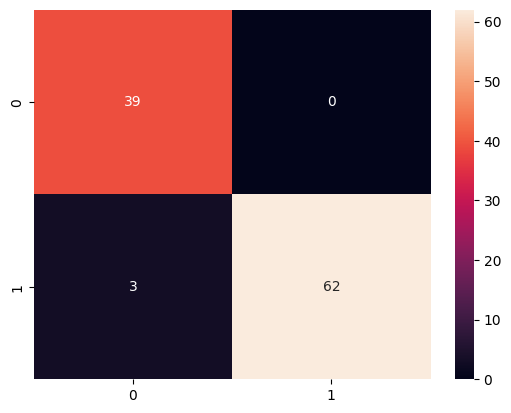

In [36]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# Random Forest

In [37]:
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'n_estimators':np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}

rf=RandomForestClassifier()
rf_rs=RandomizedSearchCV(rf,param_distributions=parameters,cv=4,random_state=42)
rf_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [38]:
pred=rf_rs.predict(xtest)

In [39]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 99.03846153846155 %
ERROR: 0.009615384615384616


# SVC Model

In [40]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,5]
}

svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=43)
svm_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 5],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=43)

In [41]:
pred=svm_rs.predict(xtest)

In [42]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 91.34615384615384 %
ERROR: 0.08653846153846154


# Logistic Regression Model

In [43]:
parameters={'max_iter':[100,200,500]}
lr=LogisticRegression()
lr_rs=RandomizedSearchCV(lr,param_distributions=parameters,cv=5,random_state=42)
lr_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=42)

In [44]:
pred=lr_rs.predict(xtest)


In [45]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 91.34615384615384 %
ERROR: 0.08653846153846154


# XGBoost Model

In [46]:
params={
    'learning_rate':0.1,
    'max_depth':8
}

model2=XGBClassifier(**params)

In [47]:
model2.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
pred=model2.predict(xtest)


In [49]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 99.03846153846155 %
ERROR: 0.009615384615384616


<AxesSubplot:>

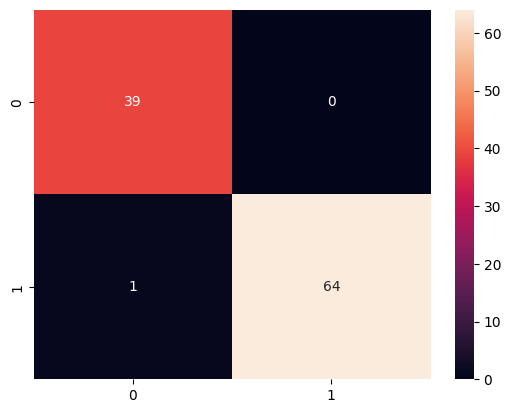

In [50]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# Conclusion

### By hyperparameter and cross validation, We got to know that XGBoost and Random Forest gives the best prediction result with accuracy of approx. 99% and error nearly close to 0.  

# For streamlit webapp

In [51]:
import pickle as pkl

In [52]:
pkl.dump(df,open('data.pkl','wb'))

In [53]:
pkl.dump(model2,open('model.pkl','wb')) #we are selecting XGboost for this app as it has most accuracy